In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
points_2011 = pd.read_csv(f"../data/grand-slam-point-data/combined-points/2011-combined-points.csv", encoding='unicode_escape', low_memory=False)
match_2011 = pd.read_csv(f"../data/grand-slam-point-data/combined-matches/2011-combined-matches.csv", encoding='unicode_escape', low_memory=False)
combined = pd.merge(points_2011, match_2011, on="match_id", how="inner")
for i in range(2012, 2022):
    points = pd.read_csv(f"../data/grand-slam-point-data/combined-points/{i}-combined-points.csv", encoding='unicode_escape', low_memory=False)
    match = pd.read_csv(f"../data/grand-slam-point-data/combined-matches/{i}-combined-matches.csv", encoding='unicode_escape', low_memory=False)
    cur_year = pd.merge(points, match, on="match_id", how="inner")
    combined = pd.concat([combined, cur_year], sort=True)

points = combined
points = points[
    ["match_id", "SetNo", "P1GamesWon", "P2GamesWon", "GameNo", "GameWinner", "PointNumber", "PointWinner", "PointServer", "P1Score",
    "P2Score", "P1Winner", "P2Winner", "P1DoubleFault", "P2DoubleFault", "P1UnfErr", "P2UnfErr", "P1BreakPoint", "P2BreakPoint", "player1_new", "player2_new"]
].dropna(how="any")
points = points.reset_index(drop=True)
points

,match_id,SetNo,P1GamesWon,P2GamesWon,GameNo,GameWinner,PointNumber,PointWinner,PointServer,P1Score,...,P1Winner,P2Winner,P1DoubleFault,P2DoubleFault,P1UnfErr,P2UnfErr,P1BreakPoint,P2BreakPoint,player1_new,player2_new
0,2011-ausopen-1101,1.0,0.0,0.0,1.0,0.0,0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,R Nadal,M Daniel
1,2011-ausopen-1101,1.0,0.0,0.0,1.0,0.0,1,1.0,2.0,15,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,R Nadal,M Daniel
2,2011-ausopen-1101,1.0,0.0,0.0,1.0,0.0,2,1.0,2.0,30,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,R Nadal,M Daniel
3,2011-ausopen-1101,1.0,0.0,0.0,1.0,0.0,3,1.0,2.0,40,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,R Nadal,M Daniel
4,2011-ausopen-1101,1.0,1.0,0.0,1.0,1.0,4,1.0,2.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,R Nadal,M Daniel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792718,2021-wimbledon-1701,4.0,5.0,3.0,9.0,0.0,272,2.0,2.0,40,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,N Djokovic,M Berrettini
792719,2021-wimbledon-1701,4.0,5.0,3.0,9.0,0.0,273,1.0,2.0,AD,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N Djokovic,M Berrettini
792720,2021-wimbledon-1701,4.0,5.0,3.0,9.0,0.0,274,2.0,2.0,40,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,N Djokovic,M Berrettini
792721,2021-wimbledon-1701,4.0,5.0,3.0,9.0,0.0,275,1.0,2.0,AD,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,N Djokovic,M Berrettini


In [4]:
points2 = pd.read_csv(f"../data/points-pressure.csv", encoding='unicode_escape', low_memory=False)
points3 = points2[["P1Errors", "P2Errors"]]
points3

,P1Errors,P2Errors
0,0.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
792718,0.0,0.0
792719,0.0,0.0
792720,0.0,0.0
792721,0.0,1.0


In [5]:
points_new = pd.concat([points, points3], axis=1)
points_new

,match_id,SetNo,P1GamesWon,P2GamesWon,GameNo,GameWinner,PointNumber,PointWinner,PointServer,P1Score,...,P1DoubleFault,P2DoubleFault,P1UnfErr,P2UnfErr,P1BreakPoint,P2BreakPoint,player1_new,player2_new,P1Errors,P2Errors
0,2011-ausopen-1101,1.0,0.0,0.0,1.0,0.0,0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,R Nadal,M Daniel,0.0,0.0
1,2011-ausopen-1101,1.0,0.0,0.0,1.0,0.0,1,1.0,2.0,15,...,0.0,0.0,0.0,1.0,0.0,0.0,R Nadal,M Daniel,0.0,1.0
2,2011-ausopen-1101,1.0,0.0,0.0,1.0,0.0,2,1.0,2.0,30,...,0.0,0.0,0.0,1.0,0.0,0.0,R Nadal,M Daniel,0.0,1.0
3,2011-ausopen-1101,1.0,0.0,0.0,1.0,0.0,3,1.0,2.0,40,...,0.0,0.0,0.0,1.0,0.0,0.0,R Nadal,M Daniel,0.0,1.0
4,2011-ausopen-1101,1.0,1.0,0.0,1.0,1.0,4,1.0,2.0,0,...,0.0,0.0,0.0,1.0,1.0,0.0,R Nadal,M Daniel,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792718,2021-wimbledon-1701,4.0,5.0,3.0,9.0,0.0,272,2.0,2.0,40,...,0.0,0.0,0.0,0.0,1.0,0.0,N Djokovic,M Berrettini,0.0,0.0
792719,2021-wimbledon-1701,4.0,5.0,3.0,9.0,0.0,273,1.0,2.0,AD,...,0.0,0.0,0.0,0.0,0.0,0.0,N Djokovic,M Berrettini,0.0,0.0
792720,2021-wimbledon-1701,4.0,5.0,3.0,9.0,0.0,274,2.0,2.0,40,...,0.0,0.0,0.0,0.0,1.0,0.0,N Djokovic,M Berrettini,0.0,0.0
792721,2021-wimbledon-1701,4.0,5.0,3.0,9.0,0.0,275,1.0,2.0,AD,...,0.0,0.0,0.0,1.0,0.0,0.0,N Djokovic,M Berrettini,0.0,1.0


In [70]:
table1 = points_new.loc[(points_new['player1_new'] == 'S Tsitsipas') | (points_new['player2_new'] == 'S Tsitsipas') & (points_new['SetNo'] == 1.0)]
table2 = points_new.loc[(((points_new['player1_new'] == 'S Tsitsipas') & (points_new['P1Errors'] == 1.0)) | ((points_new['player2_new'] == 'S Tsitsipas') & (points_new['P2Errors'] == 1.0))) & (points_new['SetNo'] == 1.0)]
print(len(table1), len(table2))

table3 = points_new.loc[(points_new['player1_new'] == 'S Tsitsipas') | (points_new['player2_new'] == 'S Tsitsipas') & (points_new['SetNo'] == 2.0)]
table4 = points_new.loc[(((points_new['player1_new'] == 'S Tsitsipas') & (points_new['P1Errors'] == 1.0)) | ((points_new['player2_new'] == 'S Tsitsipas') & (points_new['P2Errors'] == 1.0))) & (points_new['SetNo'] == 2.0)]
print(len(table3), len(table4))

table5 = points_new.loc[(points_new['player1_new'] == 'S Tsitsipas') | (points_new['player2_new'] == 'S Tsitsipas') & (points_new['SetNo'] == 3.0)]
table6 = points_new.loc[(((points_new['player1_new'] == 'S Tsitsipas') & (points_new['P1Errors'] == 1.0)) | ((points_new['player2_new'] == 'S Tsitsipas') & (points_new['P2Errors'] == 1.0))) & (points_new['SetNo'] == 3.0)]
print(len(table5), len(table6))

table7 = points_new.loc[(points_new['player1_new'] == 'S Tsitsipas') | (points_new['player2_new'] == 'S Tsitsipas') & (points_new['SetNo'] == 4.0)]
table8 = points_new.loc[(((points_new['player1_new'] == 'S Tsitsipas') & (points_new['P1Errors'] == 1.0)) | ((points_new['player2_new'] == 'S Tsitsipas') & (points_new['P2Errors'] == 1.0))) & (points_new['SetNo'] == 4.0)]
print(len(table7), len(table8))

table9 = points_new.loc[(points_new['player1_new'] == 'S Tsitsipas') | (points_new['player2_new'] == 'S Tsitsipas') & (points_new['SetNo'] == 5.0)]
table10 = points_new.loc[(((points_new['player1_new'] == 'S Tsitsipas') & (points_new['P1Errors'] == 1.0)) | ((points_new['player2_new'] == 'S Tsitsipas') & (points_new['P2Errors'] == 1.0))) & (points_new['SetNo'] == 5.0)]
print(len(table9), len(table10))

2556 134
2601 118
2612 151
2397 92
2323 40


In [71]:
plot1 = points_new.loc[(points_new['player1_new'] == 'S Tsitsipas') | (points_new['player2_new'] == 'S Tsitsipas') & (points_new['SetNo'] == 1.0)]
plot2 = points_new.loc[(((points_new['player1_new'] == 'S Tsitsipas') & (points_new['P1Winner'] == 1.0)) | ((points_new['player2_new'] == 'S Tsitsipas') & (points_new['P2Winner'] == 1.0))) & (points_new['SetNo'] == 1.0)]
print(len(plot1), len(plot2))

plot3 = points_new.loc[(points_new['player1_new'] == 'S Tsitsipas') | (points_new['player2_new'] == 'S Tsitsipas') & (points_new['SetNo'] == 2.0)]
plot4 = points_new.loc[(((points_new['player1_new'] == 'S Tsitsipas') & (points_new['P1Winner'] == 1.0)) | ((points_new['player2_new'] == 'S Tsitsipas') & (points_new['P2Winner'] == 1.0))) & (points_new['SetNo'] == 2.0)]
print(len(plot3), len(plot4))

plot5 = points_new.loc[(points_new['player1_new'] == 'S Tsitsipas') | (points_new['player2_new'] == 'S Tsitsipas') & (points_new['SetNo'] == 3.0)]
plot6 = points_new.loc[(((points_new['player1_new'] == 'S Tsitsipas') & (points_new['P1Winner'] == 1.0)) | ((points_new['player2_new'] == 'S Tsitsipas') & (points_new['P2Winner'] == 1.0))) & (points_new['SetNo'] == 3.0)]
print(len(plot5), len(plot6))

plot7 = points_new.loc[(points_new['player1_new'] == 'S Tsitsipas') | (points_new['player2_new'] == 'S Tsitsipas') & (points_new['SetNo'] == 4.0)]
plot8 = points_new.loc[(((points_new['player1_new'] == 'S Tsitsipas') & (points_new['P1Winner'] == 1.0)) | ((points_new['player2_new'] == 'S Tsitsipas') & (points_new['P2Winner'] == 1.0))) & (points_new['SetNo'] == 4.0)]
print(len(plot7), len(plot8))

plot9 = points_new.loc[(points_new['player1_new'] == 'S Tsitsipas') | (points_new['player2_new'] == 'S Tsitsipas') & (points_new['SetNo'] == 5.0)]
plot10 = points_new.loc[(((points_new['player1_new'] == 'S Tsitsipas') & (points_new['P1Winner'] == 1.0)) | ((points_new['player2_new'] == 'S Tsitsipas') & (points_new['P2Winner'] == 1.0))) & (points_new['SetNo'] == 5.0)]
print(len(plot9), len(plot10))

2556 162
2601 181
2612 196
2397 112
2323 57


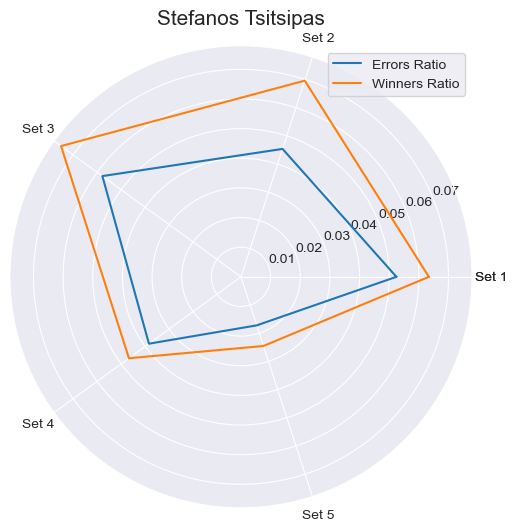

In [72]:
categories = ['Set 1', 'Set 2', 'Set 3', 'Set 4', 'Set 5']
categories = [*categories, categories[0]]

restaurant_1 = [len(table2)/len(table1), len(table4)/len(table3), len(table6)/len(table5), len(table8)/len(table7), len(table10)/len(table9)]
restaurant_2 = [len(plot2)/len(plot1), len(plot4)/len(plot3), len(plot6)/len(plot5), len(plot8)/len(plot7), len(plot10)/len(plot9)]
restaurant_1 = [*restaurant_1, restaurant_1[0]]
restaurant_2 = [*restaurant_2, restaurant_2[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(restaurant_1))

plt.figure(figsize=(6, 6))
plt.subplot(polar=True)
plt.plot(label_loc, restaurant_1, label='Errors Ratio')
plt.plot(label_loc, restaurant_2, label='Winners Ratio')
plt.title('Stefanos Tsitsipas', size=15)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.savefig("../plots/stat_tsitsipas.png")
plt.show()


In [91]:
print(len(table2)/len(table1), len(table4)/len(table3), len(table6)/len(table5), len(table8)/len(table7), len(table10)/len(table9))

print(len(plot2)/len(plot1), len(plot4)/len(plot3), len(plot6)/len(plot5), len(plot8)/len(plot7), len(plot10)/len(plot9))

0.05999777580071174 0.052241804925655895 0.04976370779479588 0.019775917926565873 0.010065676756139348
0.07417704626334519 0.07830529881164246 0.07777714513465808 0.03266738660907127 0.01599086236436322
